# 10. Morphological Operations

## Table of Contents
1. [Libraries](#libraries)
2. [Erosion](#erosion)
3. [Dilation](#dilation)
4. [Opening](#opening)
5. [Closing](#closing)
6. [Morphological Gradient](#gradient)
7. [Morphological Hats](#hats)
   1. [Top or White Hat](#top)
   1. [Black Hat](#black)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("data/image.jpg")
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("data/image.jpg",0)

[ WARN:0@0.436] global loadsave.cpp:248 findDecoder imread_('data/image.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


(400, 700, 3) (400, 700, 3) (400, 700)


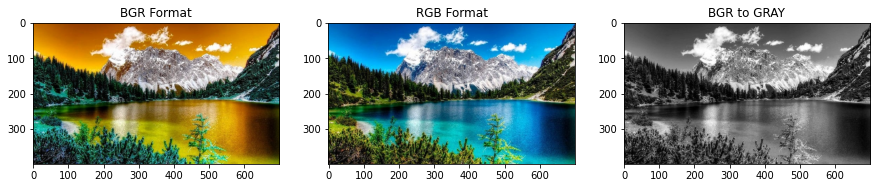

In [ ]:
#function to see image
def imgshow(img=img,img1=img1,img2=img2, rows=1,columns=3):
    print(img.shape,img1.shape,img2.shape)
    fig = plt.figure(figsize=(15,8))
    #adds a subplot at 1st position
    fig.add_subplot(rows,columns,1)
    plt.title('BGR Format')
    plt.imshow(img)

    #adds a subplot at 2nd position
    fig.add_subplot(rows,columns,2)
    plt.title('RGB Format')
    plt.imshow(img1)

    #adds a subplot at 3rd position
    fig.add_subplot(rows,columns, 3)
    plt.title('BGR to GRAY')
    plt.imshow(img2,cmap="gray")
    plt.show()
    
imgshow(img=img,img1=img1,img2=img2, rows=1,columns=3)

## Erosion <a class="anchor" id="erosion" ></a>

Erosin primarily involves eroding(thinning) outer surface(foreground) of image
- Tt is suggested to have foreground as white

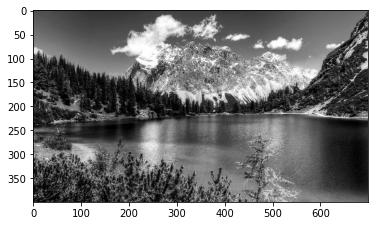

In [ ]:
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(BGR2GRAY,cmap="gray")
plt.show()

Eroding boundy of image upto 3 level

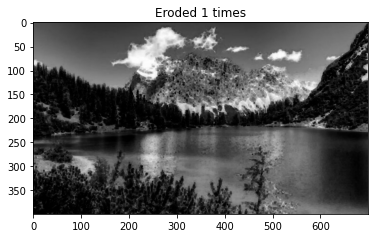

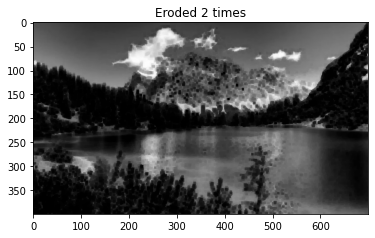

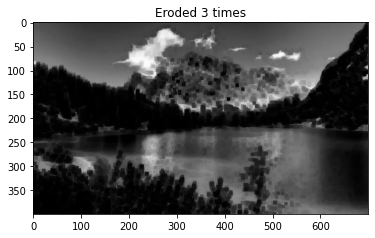

In [ ]:
def plt_imshow(title, image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()
    
for i in range(0,3):
    eroded = cv2.erode(BGR2GRAY.copy(), None, iterations=i+1)
    plt_imshow("Eroded {} times".format(i+1), eroded)

### Binarize Image

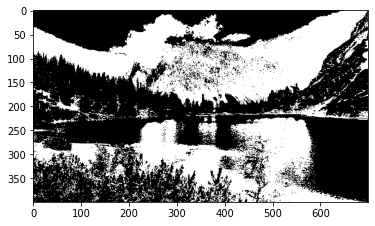

In [ ]:
binr = cv2.threshold(BGR2GRAY, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
image = cv2.cvtColor(binr, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

### We can Invert Image to keep foreground in white

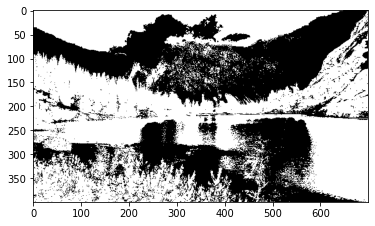

In [ ]:
invert = cv2.bitwise_not(binr)
image = cv2.cvtColor(invert, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

Then, we can define a kernel of $5 \times 5$ to use in erosion

In [ ]:
kernel = np.ones((5,5), np.uint8) #check for 3*3 or 7*7 kernel size too
print(kernel)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


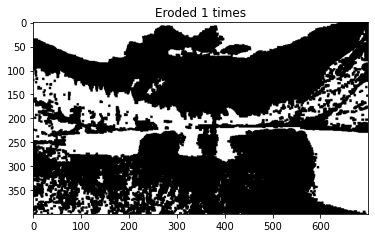

In [ ]:
for i in range(0,3):
    eroded = cv2.erode(invert.copy(),kernel=kernel, iterations=i+1)
    plt_imshow("Eroded {} times".format(i+1), eroded)

## Dilation <a class="anchor" id="dilation" ></a>

Involves dilating outer surface (foreground) of image
- For joining broken parts of an image together

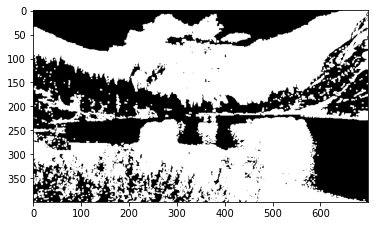

In [ ]:
#binarize image
binr = cv2.threshold(BGR2GRAY,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
kernel = np.ones((3,3),np.uint8)
invert = cv2.bitwise_not(binr)

#dilate image
dilation = cv2.dilate(binr, kernel, iterations=1)
 
plt.imshow(dilation, cmap='gray')
plt.show()

We can apply series of dilations on inverted image using no kernel


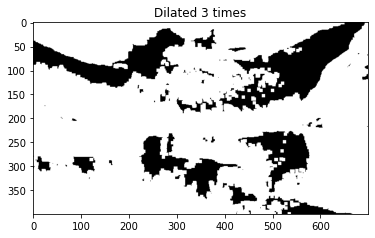

In [ ]:
for i in range(0,3):
    dilated = cv2.dilate(invert.copy(),None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),dilated)

In [ ]:
for i in range(0,4):
    dilated = cv2.dilate(BGR2GRAY.copy(),None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),dilated)

## Opening <a class="anchor" id="opening" ></a>

Erosion followed by dilation in outer surface (foreground) of image
- Generally used to remove noise (small blobs) in image


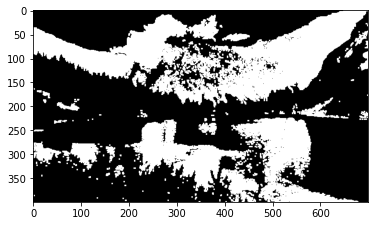

In [ ]:
#opening image
opening = cv2.morphologyEx(binr,cv2.MORPH_OPEN,kernel,iterations=1)

#print output
plt.imshow(opening, cmap='gray')
plt.show()

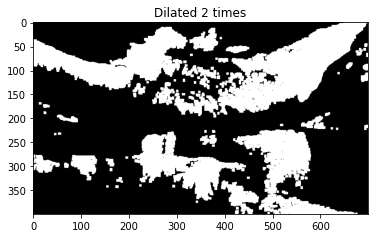

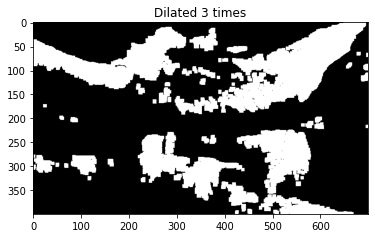

In [ ]:
for i in range(0,3):
    opening = cv2.morphologyEx(binr.copy(),cv2.MORPH_OPEN,None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),opening)
    plt.show()

## Closing <a class="anchor" id="closing" ></a>

Dilation followed by erosion in outer surface (foreground) of image
- Generally used to close holes inside of objects or for connecting components together

In [ ]:
#closing image
closing = cv2.morphologyEx(binr, cv2.MORPH_CLOSE, kernel, iterations=1)
 
#print output
plt.imshow(closing,cmap='gray')
plt.show()

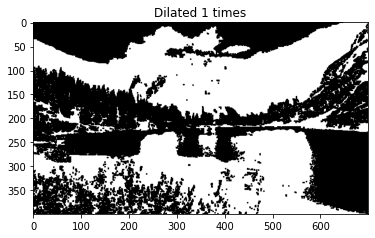

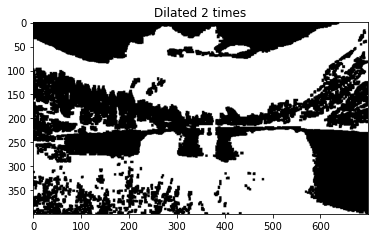

In [ ]:
for i in range(0,3):
    closing = cv2.morphologyEx(binr.copy(),cv2.MORPH_CLOSE,None,iterations= i+1)
    plt_imshow("Dilated {} times".format(i+1),closing)
    plt.show()

Iterating with different kernels

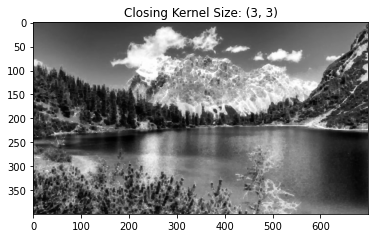

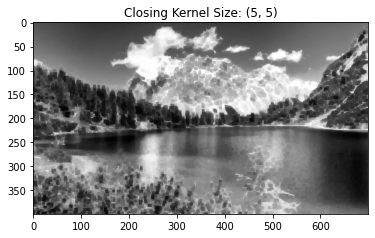

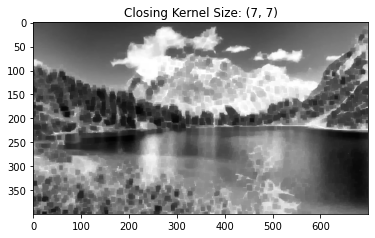

In [ ]:
kernelSizes = [(3,3), (5,5), (7,7)]
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    closing = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_CLOSE, kernel)
    plt_imshow("Closing Kernel Size: ({}, {})".format(kernelSize[0], kernelSize[1]), closing)

## Morphological Gradient <a class="anchor" id="gradient" ></a>

It first applies erosion and dilation individually on image and then computes difference between eroded and dilated image

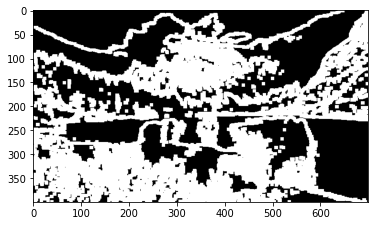

In [ ]:
# use morph gradient
morph_gradient = cv2.morphologyEx(invert,cv2.MORPH_GRADIENT,kernel)
 
#print output
plt.imshow(morph_gradient, cmap='gray')
plt.show()

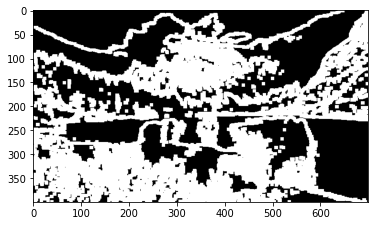

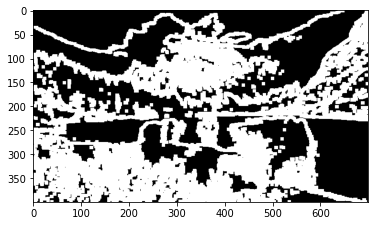

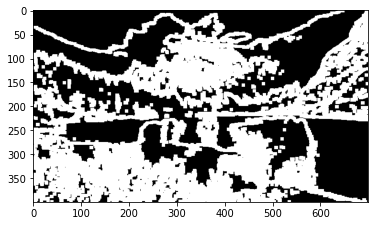

In [ ]:
for i in range(0,3): 
    # use morph gradient
    morph_gradient = cv2.morphologyEx(invert,cv2.MORPH_GRADIENT,kernel+i)
    #print output
    plt.imshow(morph_gradient, cmap='gray')
    plt.show()

Iterating with different kernels

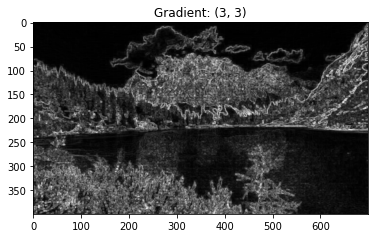

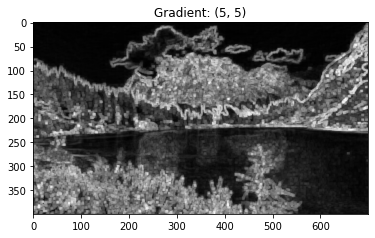

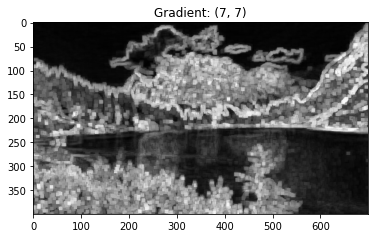

In [ ]:
kernelSizes = [(3,3), (5,5), (7,7)]
BGR2GRAY = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

for kernelSize in kernelSizes:
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    gradient = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_GRADIENT, kernel)
    plt_imshow("Gradient: ({}, {})".format(
        kernelSize[0], kernelSize[1]), gradient)

## Morphological Hats <a class="anchor" id="hats" ></a>

1. Top or White Hat
2. Black hat

### Top or White Hat <a class="anchor" id="top" ></a>

It is the difference between original (grayscale/single channel) input image and opening image

- Finds light(bright) regions of an image on dark background


In [ ]:
#construct a kernel (13x5)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(13,5))
kernel

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

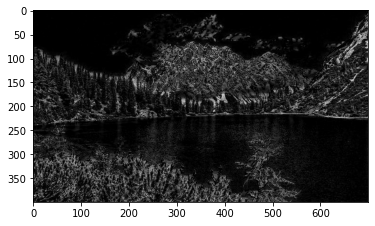

In [ ]:
tophat = cv2.morphologyEx(BGR2GRAY, cv2.MORPH_TOPHAT, kernel)

plt.imshow(tophat, cmap='gray')
plt.show()

### Black Hat <a class="anchor" id="black" ></a>

Output is a difference between input image & opened image
- Finds dark regions on a light background


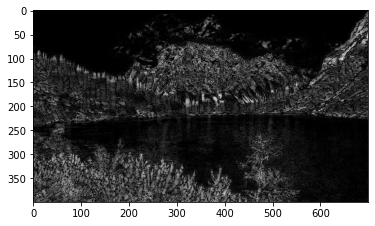

In [ ]:
blackhat = cv2.morphologyEx(BGR2GRAY,cv2.MORPH_BLACKHAT,kernel)

plt.imshow(blackhat, cmap='gray')
plt.show()

a)Investigar una aplicación de erosión en procesamiento de imágenes e implementarlo en Colab

Consiste en la eliminación de todos los píxeles del objeto en cuyo vecindario haya al
A menos un píxel que pertenezca al fondo. Su efecto es reducir el tamaño de
los objetos o eliminar los objetos que sean muy pequeños.

Este procesamiento de imágenes puede ser utilizado para una gran variedad de objetivos.
* Texturas desgastadas: en ilustraciones o fondos. Puede hacer lucir a la madera, metal y piedra con manchas y áreas desgastadas.
* Efectos de desgaste urbano: puede generar desgaste en edificios y calles. 
* Imágenes Vintage: puede incluir efectos de decoloración, manchas y marcas de desgaste. 
* Simulación de daños a objetos.
* Creación de escenarios apocalípticos.


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [171]:
image = 'puerto.png'
img = cv2.imread(image)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.imread(image,0)

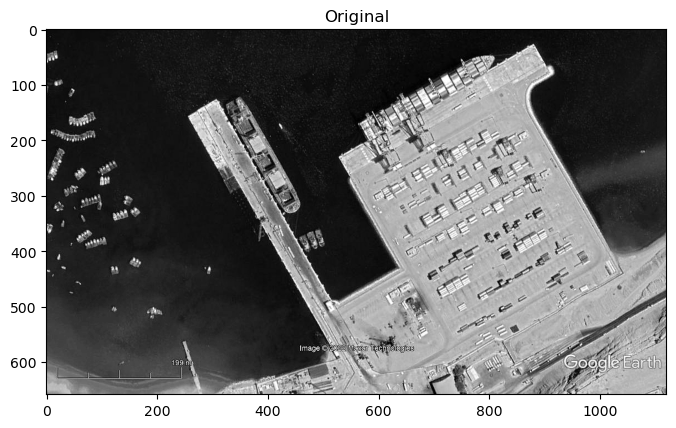

In [172]:
fig = plt.figure(figsize=(8,12))
#adds a subplot at 1st position
plt.title('Original')
plt.imshow(img2,cmap="gray")

# Erosion

Quitar los objetos más pequeños de los patrones.

In [173]:

# Create un kernel de 3x3
kernel = np.ones((3,3),np.uint8)
fig = plt.figure(figsize=(20,12))
for i in range(3):
    fig.add_subplot(1,3,i+1)
    erosion = cv2.erode(img2, kernel, iterations=i+1)
    plt.title(f'Erosion Iterations {i+1} kernel 3x3')
    plt.imshow(erosion,cmap="gray")

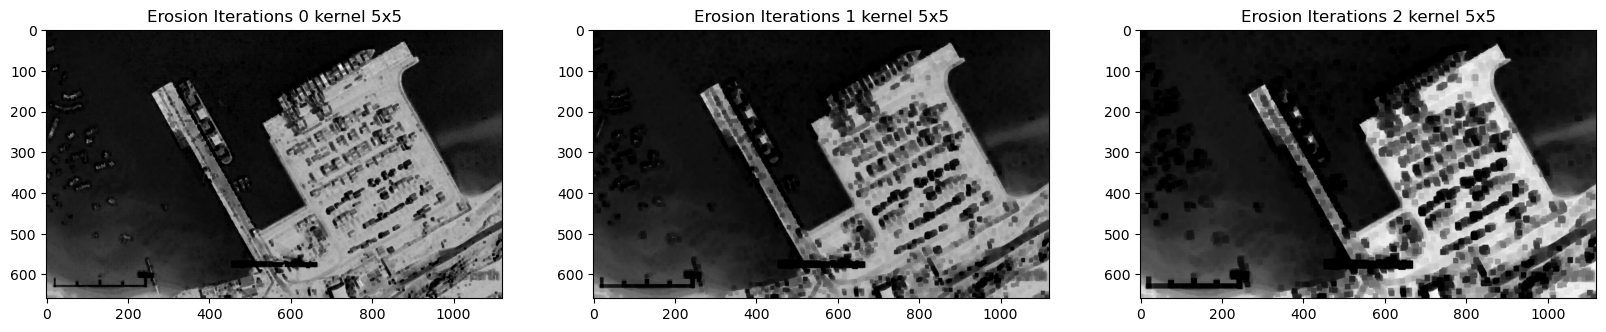

In [174]:

# Create un kernel 3x3
kernel = np.ones((5,5),np.uint8)
fig = plt.figure(figsize=(20,12))
for i in range(3):
    fig.add_subplot(1,3,i+1)
    erosion = cv2.erode(img2, kernel, iterations=i+1)
    plt.title(f'Erosion Iterations {i} kernel 5x5')
    plt.imshow(erosion,cmap="gray")

B) Investigar una aplicación de dilatación en procesamiento de imágenes e implementarlo en Colab

* La dilatación se encarga de aumentar el tamaño de los objetos o cerrar agujeros muy pequeños. ¿Qué hace la dilatación? Todo píxel de fondo en cuyo vecindario exista al menos un píxel perteneciente al objeto se convierte en el objeto. 

Se utiliza en.

* Segmentación de objetos.
* Rellenar huecos.
* Mejorar contornos.
* Eliminación de detalles pequeños.
* Operaciones morfológicas.
* Mejora el texto en imágenes.
* Adaptación a las formas irregulares.

# Dilatación 

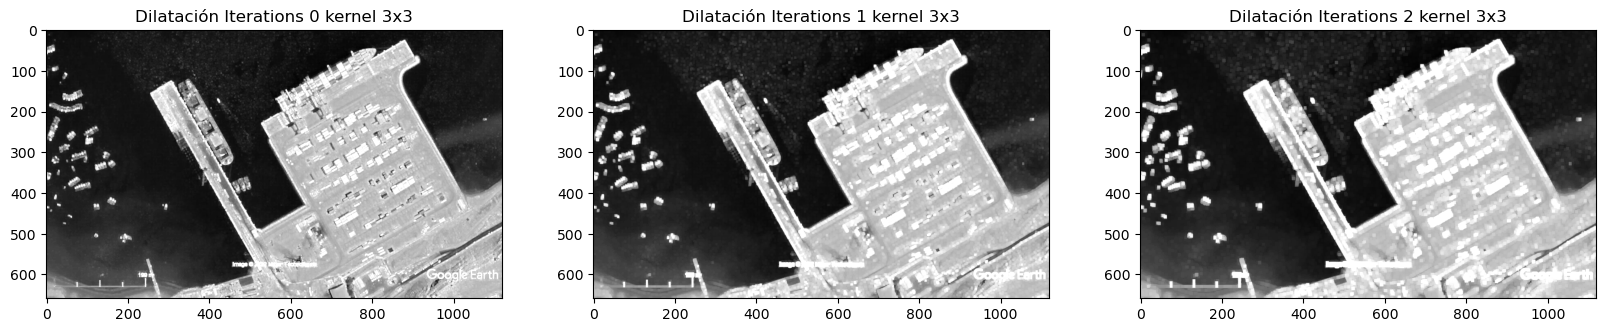

In [175]:
# Create un kernel de 3x3
kernel = np.ones((3,3),np.uint8)
fig = plt.figure(figsize=(20,12))

for i in range(3):
    fig.add_subplot(1,3,i+1)
    erosion = cv2.dilate(img2, kernel, iterations=i+1)
    plt.title(f'Dilatación Iterations {i} kernel 3x3')
    plt.imshow(erosion,cmap="gray")

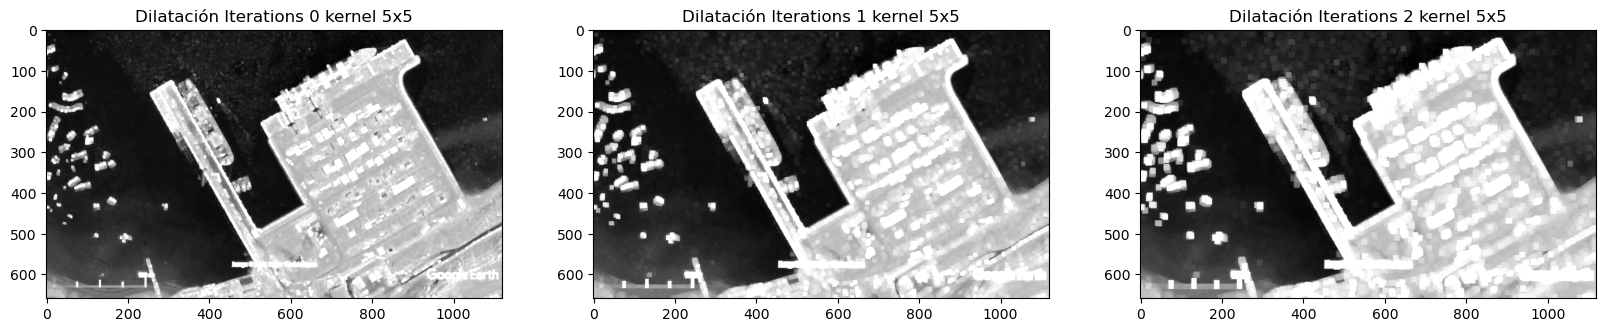

In [176]:
# Create un kernel 3x3
kernel = np.ones((5,5),np.uint8)
fig = plt.figure(figsize=(20,12))
for i in range(3):
    fig.add_subplot(1,3,i+1)
    erosion = cv2.dilate(img2, kernel, iterations=i+1)
    plt.title(f'Dilatación Iterations {i} kernel 5x5')
    plt.imshow(erosion,cmap="gray")

c) Investigar una aplicación de opening y closing e implementalo en Google Colab

El opening consiste en el encadenamiento de 2 operaciones: una erosión seguida de una dilatación. Su efecto es eliminar elementos salientes, conexiones finas y suavizar los contornos de un objeto.

Se utiliza para.

* Eliminación de ruido y pequeños detalles.
* Separación de objetos concatenados.
* Suavizar contornos.

El Closing consiste en el encadenamiento de una dilatación seguida de una erosión. Su efecto es el de fusionar 2 objetos separados por un estrecho margen. Elimina agujeros pequeños manteniendo el tamaño del objeto. Rellena huecos existentes en el contorno o suavizar el contorno. 

Se utiliza para.

* Rellenar huecos en objetos.
* Conexión de brechas en contornos.
* Unión de objetos cercanos.
* Eliminación de pequeños agujeros en el fondo.
* Mejora texto en imágenes.

In [187]:

# Create un kernel de 3x3
kernel = np.ones((3,3),np.uint8)
fig.add_subplot(1,3,i+1)
opening = cv2.morphologyEx(img2, cv2.MORPH_OPEN, kernel, iterations=1)


In [188]:
# Create un kernel de 3x3
kernel = np.ones((3,3),np.uint8)
fig.add_subplot(1,3,i+1)
close = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, kernel, iterations=1)


In [189]:
# Create un kernel de 3x3
kernel = np.ones((3,3),np.uint8)
fig.add_subplot(1,3,i+1)
openPlusClose = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)

In [190]:
# Create un kernel de 3x3
kernel = np.ones((3,3),np.uint8)
fig.add_subplot(1,3,i+1)
closePlusOpen = cv2.morphologyEx(close, cv2.MORPH_OPEN, kernel, iterations=2)

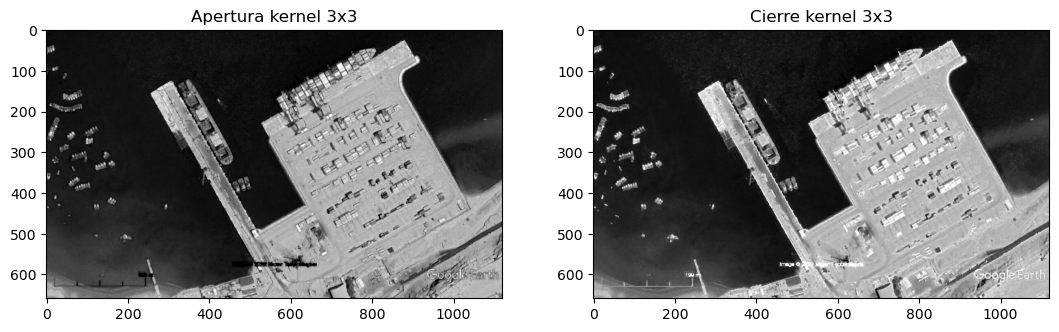

In [191]:
fig = plt.figure(figsize=(20,12))
#adds a subplot at 1st position
fig.add_subplot(1,3,1)
plt.title(f'Apertura kernel 3x3')
plt.imshow(opening,cmap="gray")

#adds a subplot at 2nd position
fig.add_subplot(1,3,2)
plt.title('RGB Format')
plt.title(f'Cierre kernel 3x3')
plt.imshow(close,cmap="gray")



Se pueden detectar bordes mediante filtros morfológicos. En este caso se puede hacer la extracción de los bordes del puerto.

In [193]:
fig = plt.figure(figsize=(20,12))

fig.add_subplot(1,2,1)
plt.title('RGB Format')
plt.title(f'Apertura + Cierre iteracion 2')
plt.imshow(openPlusClose,cmap="gray")

fig.add_subplot(1,2,2)
plt.title('RGB Format')
plt.title(f'Cierre + Apertura iteracion 2')
plt.imshow(closePlusOpen,cmap="gray")